In [1]:
!pip install imblearn==0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 34.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy as sp
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import model_selection
import matplotlib.pyplot as plt# Start writing code here...# Start writing code here...

In [4]:
warnings.filterwarnings('ignore')

we first load the data and see which are categorical and numerical. 

In [5]:
df = pd.read_csv('/work/healthcare-dataset-stroke-data.csv')
categorical = [ 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
numerical = ['avg_glucose_level', 'bmi','age']
ss = ['avg_glucose_level','bmi']
mms = ['age']

0 is no 1 is yes they have

In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


then for convenience purposes we replace the only other value in gender to female and replace the unknown in smoking status to null values.

In [8]:
df['gender'] = df['gender'].replace('Other','Female')
df['smoking_status'] = df['smoking_status'].replace({'Unknown': np.nan})

In [9]:
df.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

to replace the missing values in bmi im using mean because i think the values fit that more and most frequent for smoking status for the same reason

In [10]:
si_mean = SimpleImputer(strategy='mean')
df[['bmi']] = si_mean.fit_transform(df[['bmi']])
si_mf = SimpleImputer(strategy='most_frequent')
df[['smoking_status']] = si_mf.fit_transform(df[['smoking_status']])

im dropping the id column because it is unnecessary for the project

In [11]:
df = df.drop('id', axis=1)

## visualizing

now im gonna use a donut chart to analyze more into my dataframe

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression

gender_count = df.groupby(['gender']).size().reset_index().rename(columns={0: 'count'})
hypertension_count = df.groupby(['hypertension']).size().reset_index().rename(columns={0: 'count'})
heart_disease_count = df.groupby(['heart_disease']).size().reset_index().rename(columns={0: 'count'})
ever_married_count = df.groupby(['ever_married']).size().reset_index().rename(columns={0: 'count'})
work_type_count = df.groupby(['work_type']).size().reset_index().rename(columns={0: 'count'})
residence_type_count = df.groupby(['Residence_type']).size().reset_index().rename(columns={0: 'count'})
smoking_status_count = df.groupby(['smoking_status']).size().reset_index().rename(columns={0: 'count'})
stroke_count = df.groupby(['stroke']).size().reset_index().rename(columns={0: 'count'})

fig = make_subplots(rows=4, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]
                          ])

## Gender Donut Chart
fig.add_trace(
    go.Pie(
        labels=gender_count['gender'],
        values=gender_count['count'],
        hole=.6,
        title='Gender',
        titlefont={'color':None, 'size': 24},       
        ),
    row=1,col=1
    )

## hypertension Donut Chart
fig.add_trace(
    go.Pie(
        labels=hypertension_count['hypertension'],
        values=hypertension_count['count'],
        hole=.6,
        title='Hypertension',
        titlefont={'color':None, 'size': 24},
        ),
    row=1,col=2
    )

## heart_disease Donut Chart
fig.add_trace(
    go.Pie(
        labels=heart_disease_count['heart_disease'],
        values=heart_disease_count['count'],
        hole=.6,
        title='Heart Disease',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=1
    )


## ever_married Donut Chart
fig.add_trace(
    go.Pie(
        labels=ever_married_count['ever_married'],
        values=ever_married_count['count'],
        hole=.6,
        title='Ever Married',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=2
    )

## work_type Donut Chart
fig.add_trace(
    go.Pie(
        labels=work_type_count['work_type'],
        values=work_type_count['count'],
        hole=.6,
        title='Work Type',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=1
    )

## residence_type Donut Chart
fig.add_trace(
    go.Pie(
        labels=residence_type_count['Residence_type'],
        values=residence_type_count['count'],
        hole=.6,
        title='Residence Type',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=2
    )

## smoking_status Donut Chart
fig.add_trace(
    go.Pie(
        labels=smoking_status_count['smoking_status'],
        values=smoking_status_count['count'],
        hole=.6,
        title='Smoking Status',
        titlefont={'color':None, 'size': 24},
        ),
    row=4,col=1
    )

## stroke Donut Chart
fig.add_trace(
    go.Pie(
        labels=stroke_count['stroke'],
        values=stroke_count['count'],
        hole=.6,
        title='Stroke',
        titlefont={'color':None, 'size': 24},
        ),
    row=4,col=2
    )

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
#         colors=theme_colors,
        line=dict(color='#EEEEEE',
                  width=2)
        )
    )


fig.layout.update(title="<b> Categorical Features Donut Charts <b>",
                  titlefont={'color':None, 'size': 24, 'family': 'Courier New'},
                  showlegend=False, 
                  height=1200, 
                  width=1000,
                  template='plotly_dark',
                  title_x=0.5
                  )
fig.show()


i see that amount of people who do not have heart disease hypertension and stroke is quite high so we might already say that they might be correlated from the first hand information. and besides that i see residence type is quite equal so we can deduce that it might be irrelavant to our project however still i'll be using it.

In [13]:
fig=make_subplots(rows=2,cols=1,subplot_titles=('<i>Age', '<i>Avg Glucose Level'))
fig.add_trace(go.Histogram(x=df['age'],name='age'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['avg_glucose_level'],name='avg_glucose_level'),row=2,col=1)

fig.update_layout(height=600, width=1000, title_text='<b>Feature Distribution', font_size=20)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New')

the left side shows the number of rows with this value. we see that age is quite diverse in the dataset which i believe is to be a good thing for a correct evaluation. we see that the amount of people with avg glucose more than 150 less then 200 is quite low and the same for over 250. this tells us the distribution of outliers in the dataframe. 

In [14]:
stroke_df = df[df['stroke'] == 1]
no_stroke_df = df[df['stroke'] == 0]

fig=make_subplots(rows=2,cols=1,subplot_titles=('<i>Age', '<i>Avg Glucose Level'))

fig.add_trace(go.Box(y=stroke_df['age'], name='stroke'),row=1,col=1)
fig.add_trace(go.Box(y=no_stroke_df['age'], name='no_stroke'),row=1,col=1)

fig.add_trace(go.Box(y=stroke_df['avg_glucose_level'],name='stroke'),row=2,col=1)
fig.add_trace(go.Box(y=no_stroke_df['avg_glucose_level'],name='no_stroke'),row=2,col=1)


fig.update_layout(height=800, width=1000, title_text='<b>Box Plots', font_size=20, showlegend=False)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New')

in stroke we see that there are outliers using a box plot which shows us that the stroke of people less than 35 are uncommon

In [15]:
color_palette = ['#FFFCFE', '#B6E2D3', '#D8F9B1']

corr = df.corr()
fig = go.Figure(data= go.Heatmap(z=corr,
                                 x=corr.index.values,
                                 y=corr.columns.values,
                                 colorscale=color_palette,
                                 text = corr.round(2), texttemplate="%{text}", xgap=3, ygap=3
                                 )
                )

fig.update_layout(title_text='<b>Correlation Matrix<b>',
                  title_x=0.5,
                  titlefont={'size': 24, 'family': 'Courier New'},
                  width=900, height=600,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed', 
                  paper_bgcolor=None,
                  template='plotly_dark'
                  )

fig.show()

In [16]:
## Grouping Datasets
gender_stroke_df = df.groupby(['gender', 'stroke']).size().reset_index().rename(columns={0: 'count'})

hypertension_stroke_df = df.groupby(['hypertension', 'stroke']).size().reset_index().rename(columns={0: 'count'})

married_stroke_df = df.groupby(['ever_married', 'stroke']).size().reset_index().rename(columns={0: 'count'})

work_type_stroke_df = df.groupby(['work_type', 'stroke']).size().reset_index().rename(columns={0: 'count'})

residence_stroke_df = df.groupby(['Residence_type', 'stroke']).size().reset_index().rename(columns={0: 'count'})

smoking_stroke_df = df.groupby(['smoking_status', 'stroke']).size().reset_index().rename(columns={0: 'count'})

## Creating Sunburst Figures
sb1 = px.sunburst(gender_stroke_df, values='count', path=['gender', 'stroke'])
sb2 = px.sunburst(hypertension_stroke_df, values='count', path=['hypertension', 'stroke'])

sb3 = px.sunburst(married_stroke_df, values='count', path=['ever_married', 'stroke'])
sb4 = px.sunburst(work_type_stroke_df, values='count', path=['work_type', 'stroke'])

sb5 = px.sunburst(residence_stroke_df, values='count', path=['Residence_type', 'stroke'])
sb6 = px.sunburst(smoking_stroke_df, values='count', path=['smoking_status', 'stroke'])

## Subplots
fig = make_subplots(rows=3, cols=2, specs=[
    [{"type": "sunburst"}, {"type": "sunburst"}],
    [{"type": "sunburst"}, {"type": "sunburst"}],
    [{"type": "sunburst"}, {"type": "sunburst"}]
], subplot_titles=("Gender and Stroke", "Hypertension and Stroke",
                   "Married and Stroke", "Work Type and Stroke",
                   "Residence and Stroke", "Smoking and Stroke"))

## Plotting Figures
fig.add_trace(sb1.data[0], row=1, col=1)
fig.add_trace(sb2.data[0], row=1, col=2)
fig.add_trace(sb3.data[0], row=2, col=1)
fig.add_trace(sb4.data[0], row=2, col=2)
fig.add_trace(sb5.data[0], row=3, col=1)
fig.add_trace(sb6.data[0], row=3, col=2)

fig.update_traces(textinfo="label+percent parent")

# Update title and height
fig.update_layout(title_text="Stroke Sunbursts", title_x=0.5, height=1300, template='plotly_dark', showlegend=False,
        font=dict(
            family="Rubik",
            size=14)
)

fig.show()

## transforming and rest

now im doing the column transformer to  use ordinal encoder and one hot encode the features necessary. i will do scaling after splitting to prevent leakage

In [17]:
transformer = ColumnTransformer( 
    transformers= [
        ('1',OrdinalEncoder(categories=[['Female','Male']]),['gender']),
        ('2',OrdinalEncoder(categories=[['Rural','Urban']]),['Residence_type']),
        ('3',OrdinalEncoder(categories=[['No','Yes']]),['ever_married']),
        ('4',OneHotEncoder(categories='auto'),['work_type','smoking_status'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    )

now i have transformed my dataframe and making it into a new one to use it for the rest of the project

In [18]:
transformer.fit(df)
newdf = pd.DataFrame(transformer.transform(df), columns=transformer.get_feature_names_out())

this is my label that i will use 

In [19]:
data_stroke = newdf['stroke']

im rearranging the arrangement of the features for convenience purposes 

In [20]:
newdf = newdf[['gender','age','hypertension','heart_disease','avg_glucose_level', 'bmi','Residence_type','ever_married','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children']]

i have split my dataframe and decided my label

In [21]:
labels= data_stroke
x_train, x_test, y_train, y_test = train_test_split(newdf, labels, test_size=0.25, random_state=0)

scaling

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

imbalance

In [23]:
sm = SMOTE(random_state=4)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

## perceptron

so  what i do is first choose my model then give my K fold. then i have chosen my parameters to use it later in optimization. and after that i have used grid search to chose my best model of perceptron from the set. then i fine tune the model and get the accuracy of the best model. after that i defined my outer and inner cros validation to perform nested cross validation. after all that i print the scores of my model to see how accurate it is. before that i have fit my data to the model and made predictions from it. and finally plotting my confusion matrix to visualize the results better. i have done this for 4 models specifically that i thought was useful for my projects purpose. after all i have rea

Perceptron accuracy: 0.676056338028169
Nested Cross Validation Score: 0.9512720156555773
Confusion Matrix: 
[[833 380]
 [ 34  31]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80      1213
         1.0       0.08      0.48      0.13        65

    accuracy                           0.68      1278
   macro avg       0.52      0.58      0.47      1278
weighted avg       0.92      0.68      0.77      1278

Precision: 0.07542579075425791
Recall: 0.47692307692307695
F1 Score: 0.13025210084033617
Accuracy: 0.676056338028169



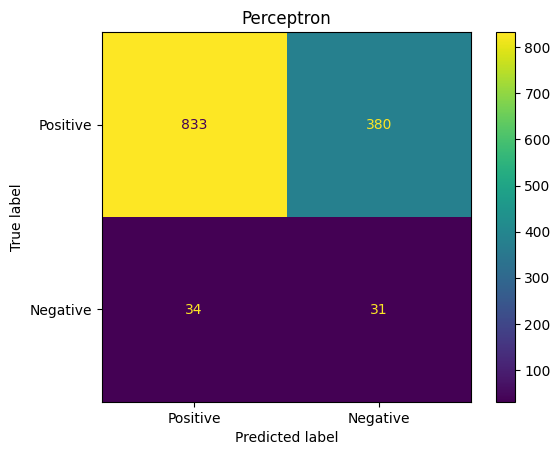

In [24]:
#mymodel
perceptron = Perceptron()

#skf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#parameters
param_grid_perceptron = {'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'alpha': [0.0001, 0.001, 0.01]}

#grid search
grid_search_perceptron = GridSearchCV(perceptron, param_grid_perceptron, cv=skf, scoring='f1', error_score='raise')
grid_search_perceptron.fit(x_train, y_train)

#best model from the grid search
best_model_perceptron = grid_search_perceptron.best_estimator_
perceptron = best_model_perceptron

# get the accuracy of the fine-tuned model on the test set
perceptron_accuracy = perceptron.score(x_test, y_test)
print(f"Perceptron accuracy: {perceptron_accuracy}")


# define the outer cross validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# define the inner cross validation
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# perform nested cross validation
nested_scores = cross_val_score(perceptron, newdf, labels, cv=outer_cv, scoring='accuracy', n_jobs=-1, error_score='raise')

# print the scores
print(f"Nested Cross Validation Score: {np.mean(nested_scores)}")

#fitting the model to the training data
perceptron.fit(x_train, y_train)

# make predictions on the test set
y_pred = perceptron.predict(x_test)

# compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion Matrix: \n{confusion}")
print(f"Classification Report: \n{report}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

#confusion matrix
plot_confusion_matrix(perceptron, x_test, y_test, values_format='d', display_labels=['Positive','Negative'])
plt.title('Perceptron')
plt.show() 

## logreg

Logreg accuracy: 0.7222222222222222
Nested Cross Validation Score: 0.9512720156555773
Confusion Matrix: 
[[872 341]
 [ 14  51]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83      1213
         1.0       0.13      0.78      0.22        65

    accuracy                           0.72      1278
   macro avg       0.56      0.75      0.53      1278
weighted avg       0.94      0.72      0.80      1278

Precision: 0.13010204081632654
Recall: 0.7846153846153846
F1 Score: 0.22319474835886216
Accuracy: 0.7222222222222222



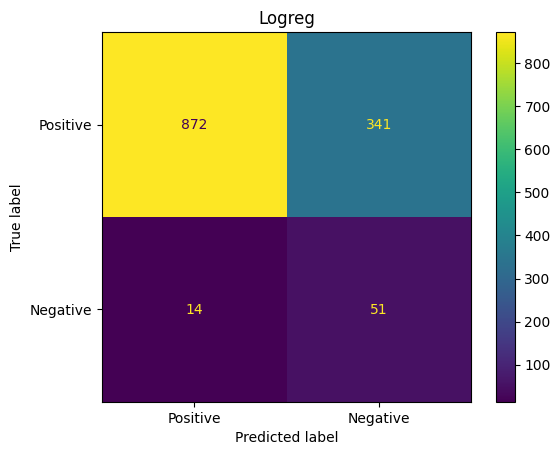

In [25]:
#mymodel
logreg = LogisticRegression()

#skf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#parameters
param_grid_logreg= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    'penalty': ['l1', 'l2'],
                    'solver': ['liblinear', 'saga']}

#grid search
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=skf, scoring='f1', error_score='raise')
grid_search_logreg.fit(x_train, y_train)

#best model from the grid search
best_model_logreg = grid_search_logreg.best_estimator_
logreg = best_model_logreg

# get the accuracy of the fine-tuned model on the test set
logreg_accuracy = logreg.score(x_test, y_test)
print(f"Logreg accuracy: {logreg_accuracy}")


# define the outer cross validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# define the inner cross validation
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# perform nested cross validation
nested_scores = cross_val_score(logreg, newdf, labels, cv=outer_cv, scoring='accuracy', n_jobs=-1, error_score='raise')

# print the scores
print(f"Nested Cross Validation Score: {np.mean(nested_scores)}")

#fitting the model to the training data
logreg.fit(x_train, y_train)

# make predictions on the test set
y_pred = logreg.predict(x_test)

# compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion Matrix: \n{confusion}")
print(f"Classification Report: \n{report}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

#confusion matrix
plot_confusion_matrix(logreg, x_test, y_test, values_format='d', display_labels=['Positive','Negative'])
plt.title('Logreg')
plt.show() 

Random Forest Classifier accuracy: 0.8959311424100157
Nested Cross Validation Score: 0.950293542074364
Confusion Matrix: 
[[1146   67]
 [  61    4]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      1213
         1.0       0.06      0.06      0.06        65

    accuracy                           0.90      1278
   macro avg       0.50      0.50      0.50      1278
weighted avg       0.90      0.90      0.90      1278

Precision: 0.056338028169014086
Recall: 0.06153846153846154
F1 Score: 0.058823529411764705
Accuracy: 0.8998435054773083



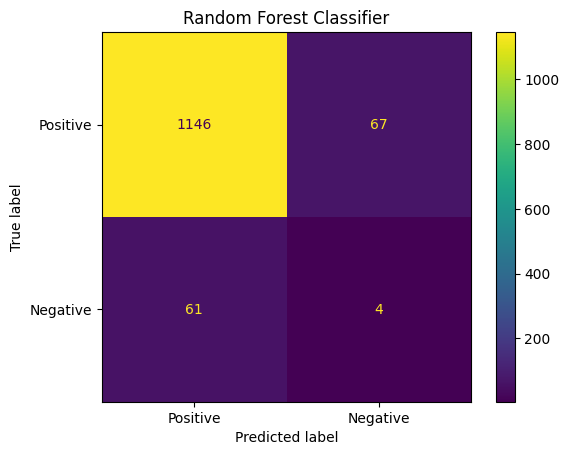

In [26]:
#mymodel
rfc = RandomForestClassifier()

#skf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#parameters
param_grid_rfc = {'n_estimators': [100, 200, 300], 
                  'max_depth': [5, 10, 15, 20],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}

#grid search
grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=skf, scoring='f1', error_score='raise')
grid_search_rfc.fit(x_train, y_train)

#best model from the grid search
best_model_rfc = grid_search_rfc.best_estimator_
rfc = best_model_rfc

# get the accuracy of the fine-tuned model on the test set
rfc_accuracy = rfc.score(x_test, y_test)
print(f"Random Forest Classifier accuracy: {rfc_accuracy}")


# define the outer cross validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# define the inner cross validation
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# perform nested cross validation
nested_scores = cross_val_score(rfc, newdf, labels, cv=outer_cv, scoring='accuracy', n_jobs=-1, error_score='raise')

# print the scores
print(f"Nested Cross Validation Score: {np.mean(nested_scores)}")

#fitting the model to the training data
rfc.fit(x_train, y_train)

# make predictions on the test set
y_pred = rfc.predict(x_test)

# compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion Matrix: \n{confusion}")
print(f"Classification Report: \n{report}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

#confusion matrix
plot_confusion_matrix(rfc, x_test, y_test, values_format='d', display_labels=['Positive','Negative'])
plt.title('Random Forest Classifier')
plt.show() 

Kneighbors accuracy: 0.8607198748043818
Nested Cross Validation Score: 0.9362035225048924
Confusion Matrix: 
[[1091  122]
 [  56    9]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      1213
         1.0       0.07      0.14      0.09        65

    accuracy                           0.86      1278
   macro avg       0.51      0.52      0.51      1278
weighted avg       0.91      0.86      0.88      1278

Precision: 0.06870229007633588
Recall: 0.13846153846153847
F1 Score: 0.09183673469387756
Accuracy: 0.8607198748043818



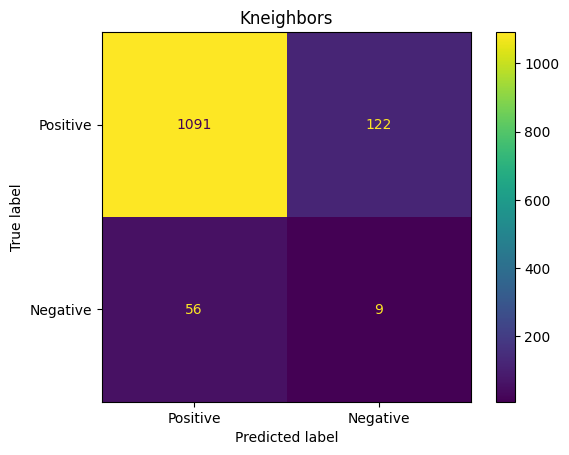

In [27]:
#mymodel
knn = KNeighborsClassifier()

#skf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#parameters
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

#grid search
grid_search_knn = GridSearchCV(knn, param_grid_knn , cv=skf, scoring='f1', error_score='raise')
grid_search_knn.fit(x_train, y_train)

#best model from the grid search
best_model_knn = grid_search_knn.best_estimator_
knn = best_model_knn

# get the accuracy of the fine-tuned model on the test set
knn_accuracy = knn.score(x_test, y_test)
print(f"Kneighbors accuracy: {knn_accuracy}")


# define the outer cross validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# define the inner cross validation
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# perform nested cross validation
nested_scores = cross_val_score(knn, newdf, labels, cv=outer_cv, scoring='accuracy', n_jobs=-1, error_score='raise')

# print the scores
print(f"Nested Cross Validation Score: {np.mean(nested_scores)}")

#fitting the model to the training data
knn.fit(x_train, y_train)

# make predictions on the test set
y_pred = knn.predict(x_test)

# compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion Matrix: \n{confusion}")
print(f"Classification Report: \n{report}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

#confusion matrix
plot_confusion_matrix(knn, x_test, y_test, values_format='d', display_labels=['Positive','Negative'])
plt.title('Kneighbors')
plt.show() 

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [29]:
from sklearn.ensemble import VotingClassifier

In [32]:
perceptron = Perceptron()
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('perceptron', perceptron), 
                                        ('logistic_regression', logistic_regression), 
                                        ('knn', knn), 
                                        ('random_forest', random_forest)], 
                           voting='hard')

# Fit the ensemble model on the training data
ensemble.fit(x_train, y_train)

# Evaluate the ensemble model on the test data
accuracy = ensemble.score(x_test, y_test)
print(f'Ensemble Accuracy: {accuracy}')

Ensemble Accuracy: 0.8748043818466353


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9fcaf419-0a18-4337-b6f8-687d7d78a489' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>